### Import Required Libraries

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [44]:
# load data set
train_data = pd.read_csv("training_data.csv")
train_class = pd.read_csv("train_data_classlabels.csv")
test_data = pd.read_csv("testing_data.csv")

In [3]:
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,50920,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,-0.411854,...,0.086793,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,76.10
1,34737,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,0.179203,...,-0.087916,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,5.95
2,11090,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,0.995869,...,-0.059598,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,14.95
3,23194,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,1.207850,...,0.155066,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,76.60
4,38531,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,-0.260688,...,0.073293,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,30.54


### Data Pre-processing

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57116 entries, 0 to 57115
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57116 non-null  int64  
 1   V1      57116 non-null  float64
 2   V2      57116 non-null  float64
 3   V3      57116 non-null  float64
 4   V4      57116 non-null  float64
 5   V5      57116 non-null  float64
 6   V6      57116 non-null  float64
 7   V7      57116 non-null  float64
 8   V8      57116 non-null  float64
 9   V9      57116 non-null  float64
 10  V10     57116 non-null  float64
 11  V11     57116 non-null  float64
 12  V12     57116 non-null  float64
 13  V13     57116 non-null  float64
 14  V14     57116 non-null  float64
 15  V15     57116 non-null  float64
 16  V16     57116 non-null  float64
 17  V17     57116 non-null  float64
 18  V18     57116 non-null  float64
 19  V19     57116 non-null  float64
 20  V20     57116 non-null  float64
 21  V21     57116 non-null  float64
 22

In [5]:
# no null values
train_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,...,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000
mean,34983.116097,-0.247795,-0.022058,0.679284,0.169507,-0.269839,0.099197,-0.111731,0.053520,0.013406,...,0.044174,-0.029317,-0.106932,-0.037896,0.006357,0.134607,0.021532,0.002800,0.001178,96.941060
std,14565.105294,1.864050,1.631035,1.410986,1.373157,1.377401,1.301175,1.247802,1.249071,1.157104,...,0.756907,0.746801,0.639153,0.626419,0.597128,0.439791,0.497490,0.379231,0.295386,270.411899
min,0.000000,-36.802320,-63.344698,-33.680984,-5.172595,-42.147898,-23.496714,-31.764946,-73.216718,-9.283925,...,-15.806476,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-7.976100,-9.617915,0.000000
25%,28865.000000,-1.009543,-0.589424,0.192506,-0.723950,-0.887752,-0.640141,-0.601216,-0.143972,-0.675191,...,-0.169140,-0.226106,-0.525390,-0.177981,-0.324780,-0.129791,-0.329274,-0.063496,-0.006171,7.600000
50%,38190.500000,-0.246743,0.074316,0.768041,0.189497,-0.301686,-0.151700,-0.071382,0.065374,-0.073948,...,-0.024862,-0.060934,-0.081307,-0.049691,0.062927,0.172505,-0.076244,0.009027,0.022540,26.265000
75%,46008.250000,1.153809,0.724232,1.399763,1.052439,0.268297,0.491501,0.423102,0.345135,0.663857,...,0.169582,0.115353,0.307514,0.080841,0.403506,0.421531,0.300119,0.082192,0.075379,88.000000
max,54280.000000,1.634039,18.902453,4.101716,16.715537,34.099309,22.529298,36.677268,20.007208,10.392889,...,39.420904,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,5.678671,19656.530000


In [6]:
# no null values in the dataset
train_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

0.0    56974
1.0      142
Name: Class, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

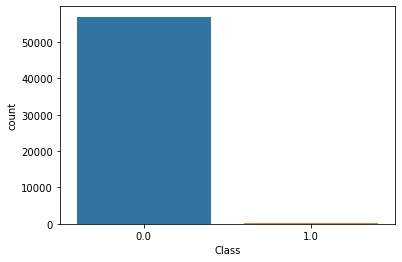

In [7]:
# highly imbalanced dataset
print(train_class['Class'].value_counts())
sns.countplot(train_class["Class"])

In [8]:
# Scaling the data: RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()

train_data['scaled_amount'] = rob_scaler.fit_transform(
    train_data['Amount'].values.reshape(-1, 1))

train_data['scaled_time'] = rob_scaler.fit_transform(
    train_data['Time'].values.reshape(-1, 1))
    
train_data.drop(['Time', 'Amount'], axis=1, inplace=True)

# visualize the data
train_data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,-0.411854,0.122070,...,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,0.619838,0.742537
1,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,0.179203,-0.032250,...,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,-0.252674,-0.201450
2,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,0.995869,-0.783621,...,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,-0.140734,-1.580826
3,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,1.207850,-0.764514,...,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,0.626057,-0.874776
4,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,-0.260688,0.284519,...,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,0.053172,0.019862


In [9]:
# merge the train data and labels
traind = train_data.copy()
traind['Class'] = train_class['Class']

# this is an unbalanced dataset
legit = traind[traind["Class"] == 0]
fraud = traind[traind["Class"] == 1]

# print the legit and fraud transactions
print(
    f'Legit: {fraud.Class.value_counts()[1]} & Fraud : {legit.Class.value_counts()[0]}')


Legit: 142 & Fraud : 56974


In [10]:
# split the data with the ratio of both the classes same
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(traind, traind['Class']):
    X_train = traind.loc[train_index]
    X_test = traind.loc[test_index]

# labels
Y_train = pd.DataFrame(X_train['Class'])
Y_test = pd.DataFrame(X_test['Class'])

# drop the class labels from the training and test data
X_train.drop(columns="Class", inplace=True)
X_test.drop(columns="Class", inplace=True)

In [11]:
print(Y_train['Class'].value_counts())
Y_test['Class'].value_counts()

0.0    39882
1.0       99
Name: Class, dtype: int64


0.0    17092
1.0       43
Name: Class, dtype: int64

### Feature Engineering or Feature Selection

In [12]:
# feature importance
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

V14              0.012491
V17              0.012375
V12              0.012040
V11              0.011871
V10              0.011587
V4               0.010008
V16              0.009806
V3               0.009267
V9               0.008544
V18              0.008458
V7               0.007947
V2               0.006906
V6               0.005889
V27              0.005606
V21              0.005508
V5               0.005429
V1               0.004988
V8               0.004642
V28              0.004378
scaled_amount    0.003083
V20              0.002812
V19              0.002511
scaled_time      0.002374
V25              0.001892
V23              0.001511
V26              0.001239
V24              0.000958
V15              0.000657
V22              0.000291
V13              0.000178
dtype: float64

<AxesSubplot:>

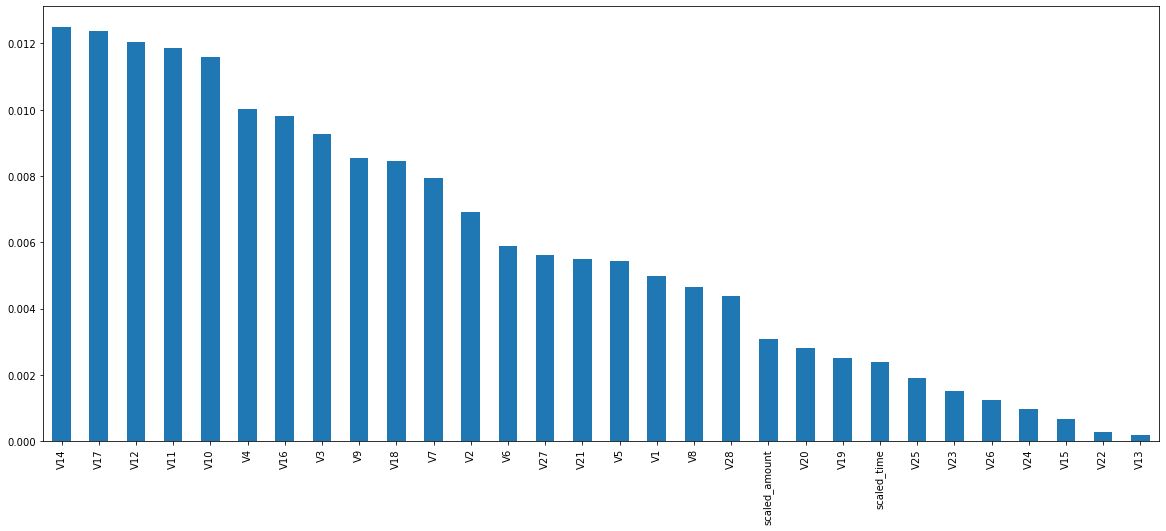

In [13]:
# visualize the feature importance
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [14]:
# select top 15 features
selector = SelectKBest(mutual_info_classif, k=15)
selector.fit(X_train, Y_train)

# Get columns to keep and create new dataframe - "new_train"
cols = selector.get_support(indices=True)

# new dataframes
new_train = X_train.iloc[:,cols]
new_test = X_test.iloc[:,cols]

### Model Training

In [15]:
# Model training
dt = DecisionTreeClassifier()
dt.fit(new_train, Y_train)
test_pred = dt.predict(new_test)

In [16]:
# AUC ROC scores on the training and test dataset
AUC_ROC_Score = roc_auc_score(Y_train, dt.predict_proba(new_train)[:, 1])
print("On training data, DT has a AUCROC Score of:", AUC_ROC_Score * 100)

AUC_ROC_Score = roc_auc_score(Y_test, dt.predict_proba(new_test)[:, 1])
print("On test data, DT has a AUCROC Score of:", AUC_ROC_Score * 100)

On training data, DT has a AUCROC Score of: 100.0
On test data, DT has a AUCROC Score of: 91.81365959322737


### Hyper-parameter tuning to overcome Overfitting

In [17]:
# Overfitting can be seen clearly
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 20),
    'max_features': ('auto', 'sqrt', 'log2'),
    # 'ccp_alpha': (for later)
}
grid = GridSearchCV(dt, param_grid=params, cv=10,
                    scoring='roc_auc')  # 10 fold cross-validation


In [18]:
grid.fit(new_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'max_features': ('auto', 'sqrt', 'log2')},
             scoring='roc_auc')

In [19]:
new_dt = grid.best_estimator_
new_dt

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2')

In [20]:
# estimating pruning alpha values
path = new_dt.cost_complexity_pruning_path(new_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [21]:
ccp_alphas

array([0.00000000e+00, 6.89049174e-05, 1.35417649e-04, 1.51737483e-04,
       1.61186725e-04, 3.27476039e-04, 5.14716184e-04, 5.73578274e-04,
       2.24453538e-03, 1.64680236e-02])

In [22]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(new_train, Y_train)
    clfs.append(clf)

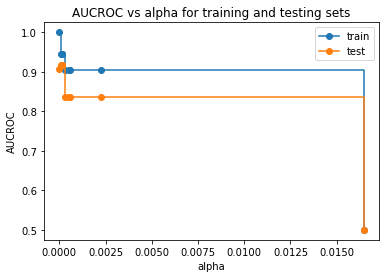

In [23]:
train_scores = [roc_auc_score(
    Y_train, clf.predict_proba(new_train)[:, 1]) for clf in clfs]
test_scores = [roc_auc_score(Y_test, clf.predict_proba(new_test)[
                             :, 1]) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("AUCROC")
ax.set_title("AUCROC vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [24]:
# get the best ccp_alpha value with lowest bias and variance
min = train_scores[0]-test_scores[0]
count = 0
for (i, j) in zip(train_scores, test_scores):
    if (i-j) != 0 and (i-j) < min:
        min = i-j
        tr = i
        tt = j
        index = count
    count = count + 1

print(
    f"Difference in AUCROC score: {min*100}\nScore on training dataset: {tr*100}\nScore on test dataset: {tt*100}\nIndex of ccp_alpha: {index}")


Difference in AUCROC score: 2.5977232211590984
Score on training dataset: 94.4383912339381
Score on test dataset: 91.840668012779
Index of ccp_alpha: 1


In [25]:
ccp_alphas[index]

6.89049173898469e-05

In [26]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas[index])
clf.fit(new_train, Y_train)

DecisionTreeClassifier(ccp_alpha=6.89049173898469e-05, random_state=0)

In [27]:
Y_predicted = clf.predict(new_test)
Y_pred_train = clf.predict(new_train)

### Evaluation

In [28]:
# AUC ROC scores on the training and test dataset
AUC_ROC_Score = roc_auc_score(Y_train, clf.predict_proba(new_train)[:, 1])
print("On training data, DT has a AUCROC Score of:", AUC_ROC_Score * 100)

AUC_ROC_Score = roc_auc_score(Y_test, clf.predict_proba(new_test)[:, 1])
print("On test data, DT has a AUCROC Score of:", AUC_ROC_Score * 100)

On training data, DT has a AUCROC Score of: 94.4383912339381
On test data, DT has a AUCROC Score of: 91.840668012779


In [29]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted, Y_test))

ac = accuracy_score(Y_test, Y_predicted)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(Y_test, Y_predicted, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(Y_test, Y_predicted, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(Y_test, Y_predicted, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(Y_train, Y_pred_train, average='macro')
print('\n Macro Averaged F1-Score on training :'+str(fm))

fm = f1_score(Y_test, Y_predicted, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))



 Confusion Matrix 

[[17087     9]
 [    5    34]]

 Macro Averaged Accuracy :0.9991829588561424

 Macro Averaged Precision :0.935634216430894

 Macro Averaged Recall :0.8952025699497657

 Macro Averaged F1-Score :0.9144293961367131

 Macro Averaged F1-Score on training :0.9405463624167917

 Micro Averaged F1-Score:0.9991829588561424


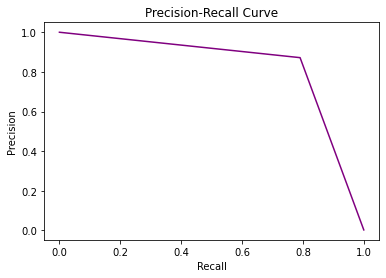

In [30]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Y_test, Y_predicted)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

[Text(697.5, 489.24, 'X[11] <= -2.715\ngini = 0.005\nsamples = 39981\nvalue = [39882, 99]'),
 Text(279.0, 380.52000000000004, 'X[5] <= -3.41\ngini = 0.363\nsamples = 105\nvalue = [25, 80]'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 47\nvalue = [0, 47]'),
 Text(418.5, 271.8, 'X[14] <= 1.087\ngini = 0.49\nsamples = 58\nvalue = [25, 33]'),
 Text(279.0, 163.08000000000004, 'X[13] <= 0.382\ngini = 0.285\nsamples = 29\nvalue = [5, 24]'),
 Text(139.5, 54.360000000000014, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(418.5, 54.360000000000014, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(558.0, 163.08000000000004, 'gini = 0.428\nsamples = 29\nvalue = [20, 9]'),
 Text(1116.0, 380.52000000000004, 'X[9] <= -6.873\ngini = 0.001\nsamples = 39876\nvalue = [39857, 19]'),
 Text(976.5, 271.8, 'X[4] <= 3.082\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(837.0, 163.08000000000004, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(1116.0, 163.08000000000004, 'gini = 0.0\nsamples = 2\n

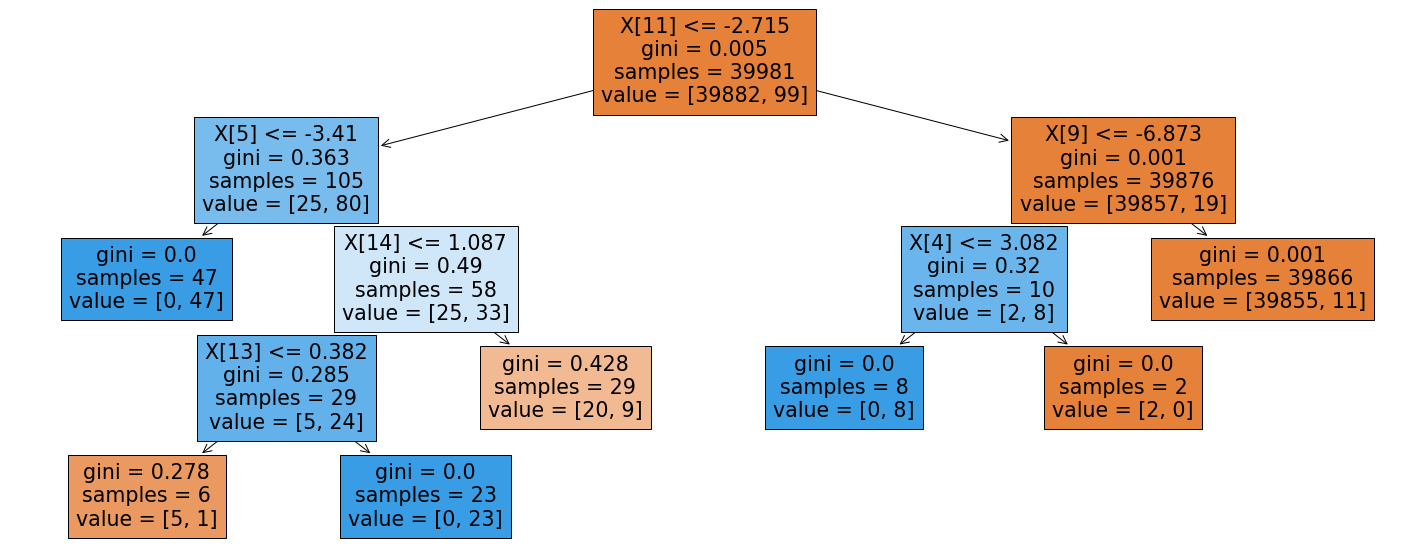

In [31]:
plt.figure(figsize=(25, 10))
tree.plot_tree(clf, filled=True)


### Random Forest - Model Training

In [32]:
rf = RandomForestClassifier()

# training the random forest model on original features
rf = rf.fit(X_train, Y_train)


### Evaluation

In [33]:
# AUC ROC scores on the training and test dataset
AUC_ROC_Score = roc_auc_score(Y_train, rf.predict_proba(X_train)[:, 1])
print("On training data, DT has a AUCROC Score of:", AUC_ROC_Score * 100)

AUC_ROC_Score = roc_auc_score(Y_test, rf.predict_proba(X_test)[:, 1])
print("On test data, DT has a AUCROC Score of:", AUC_ROC_Score * 100)

On training data, DT has a AUCROC Score of: 100.0
On test data, DT has a AUCROC Score of: 94.04440537936965


In [34]:
Y_predicted = rf.predict(X_test)
Y_pred_train = rf.predict(X_train)

In [35]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted, Y_test))

ac = accuracy_score(Y_test, Y_predicted)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(Y_test, Y_predicted, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(Y_test, Y_predicted, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(Y_test, Y_predicted, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(Y_test, Y_predicted, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))



 Confusion Matrix 

[[17087     7]
 [    5    36]]

 Macro Averaged Accuracy :0.9992996790195506

 Macro Averaged Precision :0.9388196400391522

 Macro Averaged Recall :0.9184583839032541

 Macro Averaged F1-Score :0.9283959181285573

 Micro Averaged F1-Score:0.9992996790195506


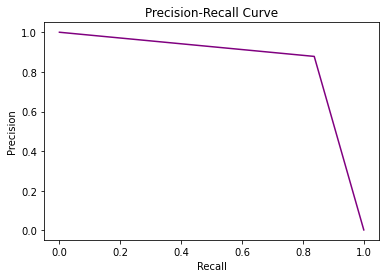

In [36]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Y_test, Y_predicted)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

### Test Data

In [45]:
# Scaling the data: RobustScaler is less prone to outliers.
test_data['scaled_amount'] = rob_scaler.fit_transform(
    test_data['Amount'].values.reshape(-1, 1))

test_data['scaled_time'] = rob_scaler.fit_transform(
    test_data['Time'].values.reshape(-1, 1))
    
test_data.drop(['Time', 'Amount'], axis=1, inplace=True)

# visualize the data
test_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,-0.839499,0.916987,1.912416,1.108648,-0.672263,0.051176,-0.036875,0.636539,0.050864,-0.940164,...,0.078684,0.414923,-0.085743,0.625238,0.109643,-0.330143,-0.000965,0.003413,-0.145348,0.627245
1,-1.560421,1.007666,0.799862,-0.456506,-0.595015,-0.582802,-0.296379,0.964852,-0.204514,-0.874606,...,0.134970,0.288105,-0.154460,0.397320,-0.110161,0.470593,-0.060721,0.014212,-0.320693,0.153946
2,-0.216150,-2.541602,-0.932535,0.675208,-1.052992,-0.352356,1.032765,-0.253473,0.087743,-0.343974,...,0.397866,-0.554943,-0.808129,0.098446,0.238762,1.014958,-0.251693,0.111646,9.153762,0.489937
3,-0.543125,0.741029,0.552261,0.749349,0.612035,0.797614,1.120176,-0.073450,-0.644201,-0.186807,...,0.094355,0.352583,-0.241595,-1.292714,0.009425,-0.152050,0.091837,0.123704,1.395562,0.269352
4,0.887965,-1.055805,0.820712,-0.308878,-1.252033,0.150234,-0.806711,0.214245,0.742892,-0.134993,...,0.294355,0.414927,-0.239961,-0.259445,-0.037567,1.501088,-0.099707,0.030234,1.998537,0.341075


In [46]:
# test data has null values
test_data.isnull().sum()

V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              1
V27              1
V28              1
scaled_amount    1
scaled_time      0
dtype: int64

In [47]:
# Using imputer to put median of the feature in place of null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(test_data)
X = imputer.transform(test_data)

In [48]:
tester = pd.DataFrame(X, columns=test_data.columns)

In [49]:
tester.isnull().sum()

V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
scaled_amount    0
scaled_time      0
dtype: int64

In [50]:
tester

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,-0.839499,0.916987,1.912416,1.108648,-0.672263,0.051176,-0.036875,0.636539,0.050864,-0.940164,...,0.078684,0.414923,-0.085743,0.625238,0.109643,-0.330143,-0.000965,0.003413,-0.145348,0.627245
1,-1.560421,1.007666,0.799862,-0.456506,-0.595015,-0.582802,-0.296379,0.964852,-0.204514,-0.874606,...,0.134970,0.288105,-0.154460,0.397320,-0.110161,0.470593,-0.060721,0.014212,-0.320693,0.153946
2,-0.216150,-2.541602,-0.932535,0.675208,-1.052992,-0.352356,1.032765,-0.253473,0.087743,-0.343974,...,0.397866,-0.554943,-0.808129,0.098446,0.238762,1.014958,-0.251693,0.111646,9.153762,0.489937
3,-0.543125,0.741029,0.552261,0.749349,0.612035,0.797614,1.120176,-0.073450,-0.644201,-0.186807,...,0.094355,0.352583,-0.241595,-1.292714,0.009425,-0.152050,0.091837,0.123704,1.395562,0.269352
4,0.887965,-1.055805,0.820712,-0.308878,-1.252033,0.150234,-0.806711,0.214245,0.742892,-0.134993,...,0.294355,0.414927,-0.239961,-0.259445,-0.037567,1.501088,-0.099707,0.030234,1.998537,0.341075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14275,-1.026431,-0.718597,2.291596,-3.057681,-1.304122,-0.766397,-0.441554,0.144293,-2.060949,0.677217,...,0.045393,0.188862,-0.223333,0.449730,0.367339,-0.380917,-0.118735,0.084634,0.296305,0.113571
14276,-6.446671,3.659475,-4.911782,1.401546,-3.845502,-1.221395,-2.211515,4.047933,0.756492,0.433927,...,0.095589,-0.080367,-0.228818,0.292166,-0.294013,-0.448384,0.188717,-0.046614,0.764419,-1.127200
14277,-0.636005,1.705460,1.179507,2.088935,1.030706,1.162806,0.658290,0.056382,-1.140353,1.831281,...,-0.366179,-0.658901,-0.247957,-1.423067,-0.117154,0.028495,0.429521,0.074814,-0.265577,-0.266945
14278,0.460469,0.176916,-0.078363,-0.650061,-1.211166,-0.682273,-0.829807,0.467589,-0.687301,0.829694,...,0.042495,0.001436,0.556212,0.006420,-1.161134,-0.564934,-0.015079,-0.134042,-0.211072,0.020368


In [51]:
# predicting the classes of the test data
pred_test_data = rf.predict(tester)

In [53]:
df = pd.DataFrame(pred_test_data, columns = ['Class'])

In [56]:
print(df['Class'].value_counts())

0.0    14250
1.0       30
Name: Class, dtype: int64
